# Importing Libraries and Reading CSV

In [325]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

fib_raw = pd.read_csv('../shbne/FIB/Mapped with Nutrients.csv')
fib_raw.head() #Display the read CSV

,Date,Week No,Year,Site,Date_TAG,event_type,ent,tet_ent,tyl_ent,ecoli,Precip,Precip-1,Temp,Temp-1,TSS,DRP,TP,TN,Avg_Flow
0,18/03/2021,12,2021,BHL-5,BHL-5-12-2021,base,141.0,28.0,6.0,79.0,NaN,0.0,NaN,26.3,NaN,NaN,NaN,NaN,NaN
1,18/03/2021,12,2021,T8,T8-12-2021,base,126.0,16.0,1.0,75.0,NaN,NaN,NaN,NaN,0.5,0.083,0.087,16.402,0.001087
2,18/03/2021,12,2021,S11,S11-12-2021,base,77.0,21.0,2.0,10.0,NaN,NaN,NaN,NaN,0.5,0.028,0.033,18.149,0.022349
3,18/03/2021,12,2021,SW12,SW12-12-2021,base,20.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,3.0,0.002,0.027,10.910,0.022349
4,09/04/2021,15,2021,BHL-5,BHL-5-15-2021,base,52.0,4.0,1.0,16.0,0.0,NaN,67.4,NaN,NaN,NaN,NaN,NaN,NaN


# Understanding Data

In [329]:
# View Columns in the data
fib_raw.columns

Index(['Date', 'Week No', 'Year', 'Site', 'Date_TAG', 'event_type', 'ent',
       'tet_ent', 'tyl_ent', 'ecoli', 'Precip', 'Precip-1', 'Temp', 'Temp-1',
       'TSS', 'DRP', 'TP', 'TN', 'Avg_Flow'],
      dtype='object')

In [327]:
#Check null values in the data
summary_raw_na = pd.DataFrame({
    'column_name': fib_raw.columns,
    'null_count': fib_raw.isnull().sum()
})
print(summary_raw_na)

           column_name  null_count
Date              Date           0
Week No        Week No           0
Year              Year           0
Site              Site           0
Date_TAG      Date_TAG           0
event_type  event_type           0
ent                ent          29
tet_ent        tet_ent          29
tyl_ent        tyl_ent          22
ecoli            ecoli          35
Precip          Precip          23
Precip-1      Precip-1          23
Temp              Temp          23
Temp-1          Temp-1          23
TSS                TSS         106
DRP                DRP         106
TP                  TP         106
TN                  TN         106
Avg_Flow      Avg_Flow         106


In [328]:
#Replacing null value for precipitation with zero for "no precipitation that day"
fib_raw = fib_raw.fillna({'Precip': 0, 'Precip-1': 0})

In [134]:
#Extracting the statical report of the input data
summary_raw_na = pd.DataFrame({
    'column_name': fib_raw.columns,
    'null_count': fib_raw.isnull().sum()
})
print(summary_raw_na)

           column_name  null_count
Date              Date           0
Week No        Week No           0
Year              Year           0
Site              Site           0
Date_TAG      Date_TAG           0
event_type  event_type           0
ent                ent          29
tet_ent        tet_ent          29
tyl_ent        tyl_ent          22
ecoli            ecoli          35
Precip          Precip           0
Precip-1      Precip-1           0
Temp              Temp          23
Temp-1          Temp-1          23
TSS                TSS         106
DRP                DRP         106
TP                  TP         106
TN                  TN         106
Avg_Flow      Avg_Flow         106


In [135]:
#Storing the statitcs in a dataframe to be used in report later
mean = fib_raw.mean()
median = fib_raw.median()
standard_deviation = fib_raw.std()
min_value = fib_raw.min()
max_value = fib_raw.max()

In [136]:
descriptive_stats = pd.DataFrame({
    'mean': fib_raw.mean(),
    'median': fib_raw.median(),
    'standard_deviation': fib_raw.std(),
    'minimum_value': fib_raw.min(),
    'maximum_value': fib_raw.max(),
})

#Print and check now
descriptive_stats.head(20)

,mean,median,standard_deviation,minimum_value,maximum_value
Avg_Flow,0.032597,0.013933,0.047470,0.0,0.32386
DRP,0.080032,0.008000,0.463554,0.001,5.748
Date,NaN,NaN,NaN,01/08/2018,31/08/2021
Date_TAG,NaN,NaN,NaN,BHL-5-12-2021,W11-28-2020
Precip,0.120907,0.000000,0.291811,0.0,1.66
Precip-1,0.120907,0.000000,0.291811,0.0,1.66
Site,NaN,NaN,NaN,BHL-5,W11
TN,13.795527,12.699000,9.947099,0.0,38.445
TP,0.164567,0.038000,0.603252,0.0,6.391
TSS,103.987903,7.000000,755.824553,0.5,11166.0


In [139]:
# Eliminaating columns not to be consiered in further analysis
fib_raw2 = fib_raw.loc[:, ~fib_raw.columns.isin(['Date', 'assists', 'event_type','Date_TAG'])]

In [140]:
#View final data to be analyzed further
fib_raw2.head(10)

,Week No,Year,Site,ent,tet_ent,tyl_ent,ecoli,Precip,Precip-1,Temp,Temp-1,TSS,DRP,TP,TN,Avg_Flow
0,12,2021,BHL-5,141.0,28.0,6.0,79.0,0.0,0.0,NaN,26.3,NaN,NaN,NaN,NaN,NaN
1,12,2021,T8,126.0,16.0,1.0,75.0,0.0,0.0,NaN,NaN,0.5,0.083,0.087,16.402,0.001087
2,12,2021,S11,77.0,21.0,2.0,10.0,0.0,0.0,NaN,NaN,0.5,0.028,0.033,18.149,0.022349
3,12,2021,SW12,20.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,3.0,0.002,0.027,10.910,0.022349
4,15,2021,BHL-5,52.0,4.0,1.0,16.0,0.0,0.0,67.4,NaN,NaN,NaN,NaN,NaN,NaN
5,15,2021,T8,888.0,125.0,39.0,1000.0,0.0,0.0,67.4,67.4,0.5,0.081,0.085,20.973,0.012124
6,15,2021,S11,88.0,14.0,3.0,40.0,0.0,0.0,67.4,67.4,2.0,0.015,0.021,25.343,0.009243
7,15,2021,SW12,6.0,1.0,0.0,4.0,0.0,0.0,67.4,67.4,6.0,0.001,0.031,10.290,0.073479
8,16,2021,BHL-5,38.0,3.0,0.0,16.0,0.0,0.0,NaN,67.4,NaN,NaN,NaN,NaN,NaN
9,16,2021,T8,172.0,3.0,1.0,380.0,0.0,0.0,NaN,NaN,0.5,0.049,0.047,21.386,0.004176


In [197]:
fib_raw2.columns

Index(['Week No', 'Year', 'Site', 'ent', 'tet_ent', 'tyl_ent', 'ecoli',
       'Precip', 'Precip-1', 'Temp', 'Temp-1', 'TSS', 'DRP', 'TP', 'TN',
       'Avg_Flow'],
      dtype='object')

In [260]:
#fib_raw2[['ecoli']].plot(kind='box') [used this to view box plot]
#further eliminating time tags to treat this data independent of time
fib_sel_var = fib_raw2.loc[:,['Site', 'ent', 'tet_ent', 'tyl_ent', 'ecoli','Precip', 'Precip-1', 'Temp', 'Temp-1', 'TSS', 'DRP', 'TP', 'TN', 'Avg_Flow']]
fib_sel_var.head()

,Site,ent,tet_ent,tyl_ent,ecoli,Precip,Precip-1,Temp,Temp-1,TSS,DRP,TP,TN,Avg_Flow
0,BHL-5,141.0,28.0,6.0,79.0,0.0,0.0,NaN,26.3,NaN,NaN,NaN,NaN,NaN
1,T8,126.0,16.0,1.0,75.0,0.0,0.0,NaN,NaN,0.5,0.083,0.087,16.402,0.001087
2,S11,77.0,21.0,2.0,10.0,0.0,0.0,NaN,NaN,0.5,0.028,0.033,18.149,0.022349
3,SW12,20.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,3.0,0.002,0.027,10.910,0.022349
4,BHL-5,52.0,4.0,1.0,16.0,0.0,0.0,67.4,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
fib_sel_var.columns

Index(['Site', 'ent', 'tet_ent', 'tyl_ent', 'ecoli', 'Precip', 'Precip-1',
       'Temp', 'Temp-1', 'TSS', 'DRP', 'TP', 'TN', 'Avg_Flow'],
      dtype='object')

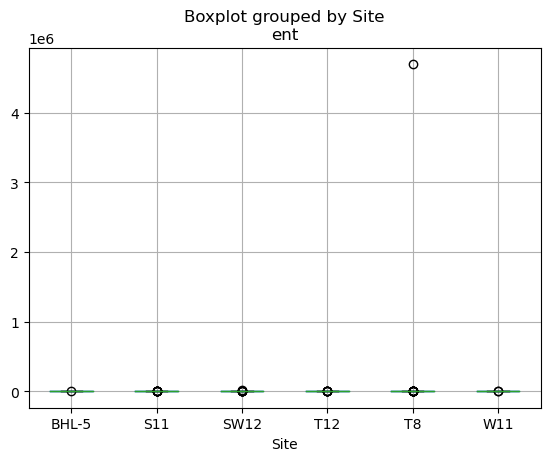

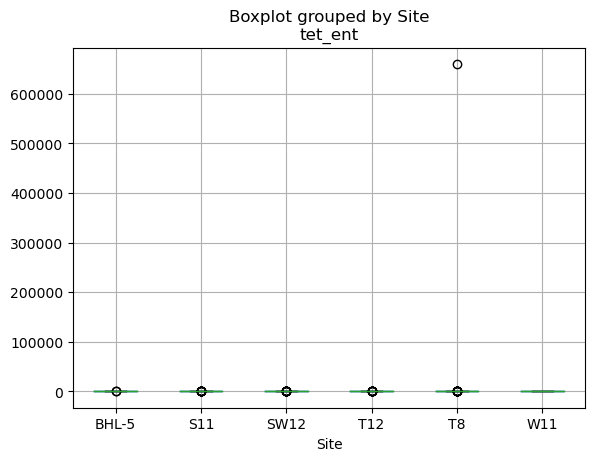

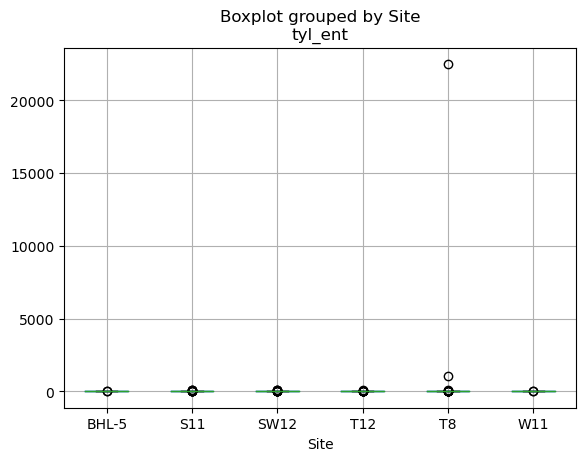

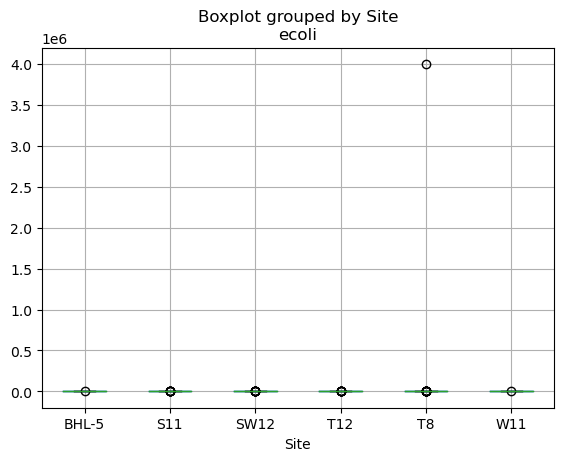

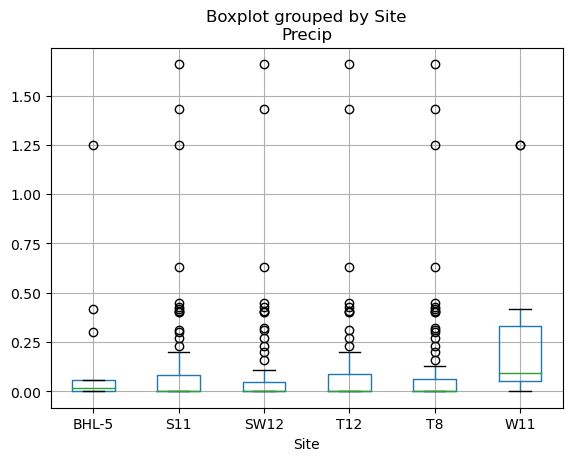

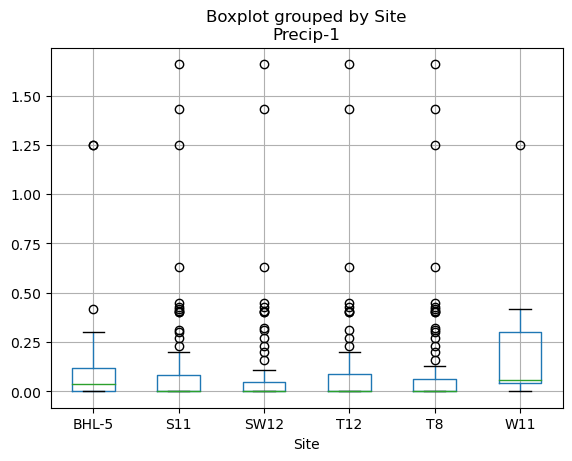

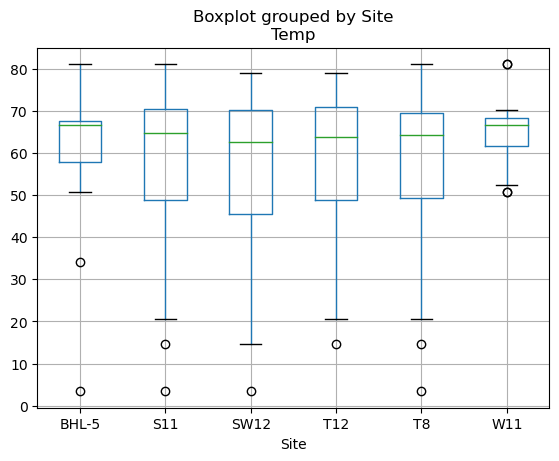

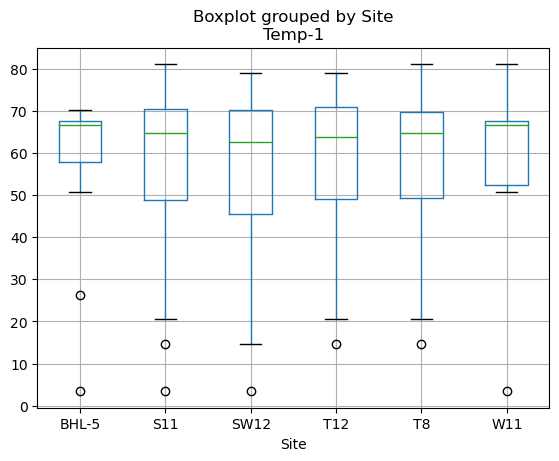

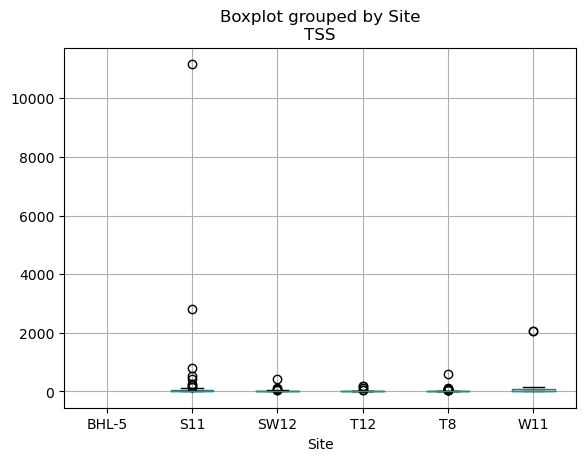

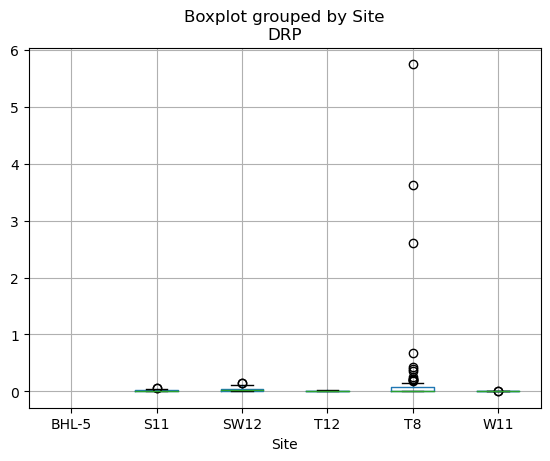

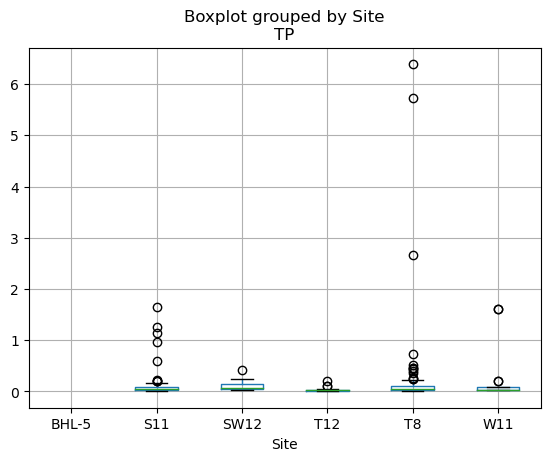

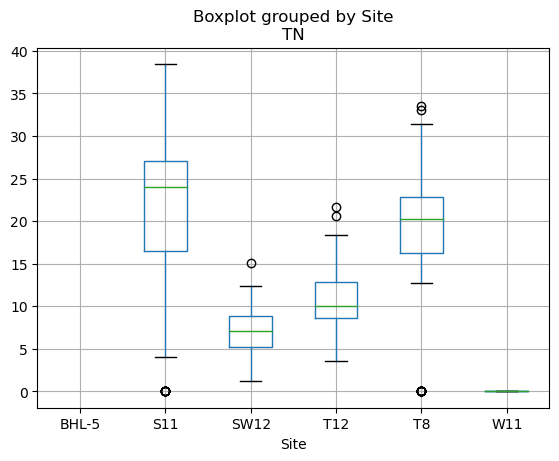

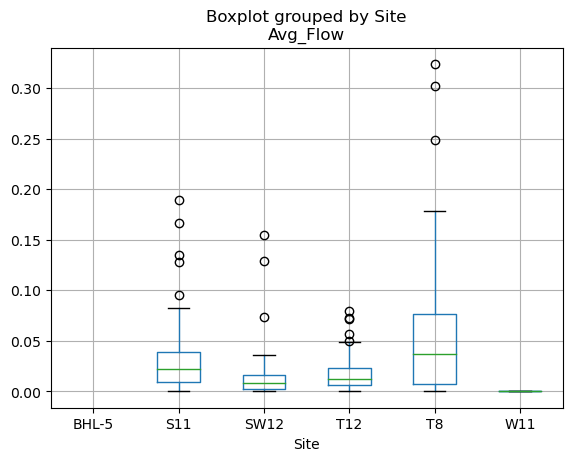

In [273]:
# Making box plot to see outliers
list = ['ent', 'tet_ent', 'tyl_ent', 'ecoli', 'Precip', 'Precip-1','Temp', 'Temp-1', 'TSS', 'DRP', 'TP', 'TN', 'Avg_Flow']

for col in list:
    fib_sel_var.boxplot(column=col, by='Site');
plt.show()

In [292]:
# Eliminating values of variable "ent", "tet_ent", "tyl_ent" & "ecoli" which are more than 3000, 400, 200 and 4500 respectively anf limiting them to these values. Assuming these to be maximum limit of detection for this model
max_val = 3000
fixed_val = np.nan
cols_to_eliminate = ['ent']
fib_sel_var[cols_to_eliminate] = fib_sel_var[cols_to_eliminate].clip(upper=max_val, axis=1).fillna(fixed_val)


max_val = 400
fixed_val = np.nan
cols_to_eliminate = ['tet_ent']
fib_sel_var[cols_to_eliminate] = fib_sel_var[cols_to_eliminate].clip(upper=max_val, axis=1).fillna(fixed_val)

max_val = 200
fixed_val = np.nan
cols_to_eliminate = ['tyl_ent']
fib_sel_var[cols_to_eliminate] = fib_sel_var[cols_to_eliminate].clip(upper=max_val, axis=1).fillna(fixed_val)

max_val = 4500
fixed_val = np.nan
cols_to_eliminate = ['ecoli']
fib_sel_var[cols_to_eliminate] = fib_sel_var[cols_to_eliminate].clip(upper=max_val, axis=1).fillna(fixed_val)
print(fib_sel_var)

      Site    ent  tet_ent  tyl_ent   ecoli  Precip  Precip-1  Temp  Temp-1  \
0    BHL-5  141.0     28.0      6.0    79.0     0.0       0.0   NaN    26.3   
1       T8  126.0     16.0      1.0    75.0     0.0       0.0   NaN     NaN   
2      S11   77.0     21.0      2.0    10.0     0.0       0.0   NaN     NaN   
3     SW12   20.0      0.0      0.0     3.0     0.0       0.0   NaN     NaN   
4    BHL-5   52.0      4.0      1.0    16.0     0.0       0.0  67.4     NaN   
..     ...    ...      ...      ...     ...     ...       ...   ...     ...   
348    S11  102.0     25.0     13.0    23.0     0.0       0.0  44.8    32.6   
349    S11  100.0     44.0     11.0    12.0     0.0       0.0  48.7    44.8   
350    S11   51.0     11.0      6.0    14.0     0.0       0.0  40.8    48.7   
351    S11    6.0      3.0      1.0     3.0     0.0       0.0  26.7    40.8   
352    S11  337.0     39.0      5.0  1010.0     0.0       0.0  35.5    26.7   

            TSS    DRP     TP      TN  Avg_Flow  
0

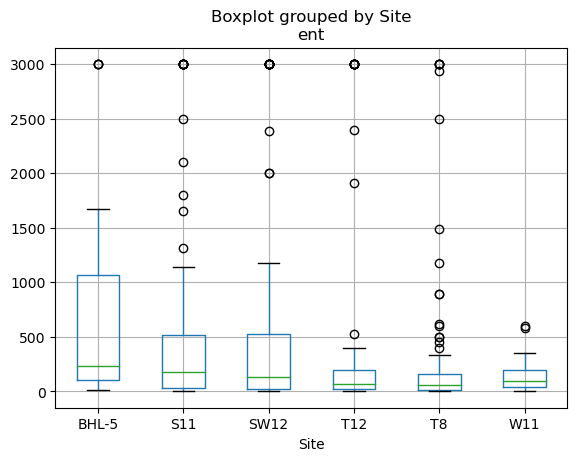

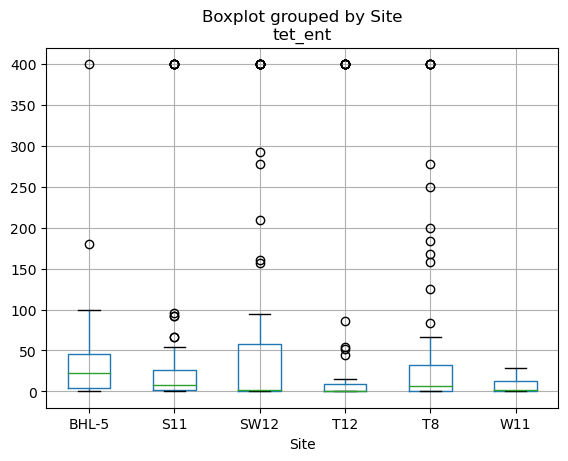

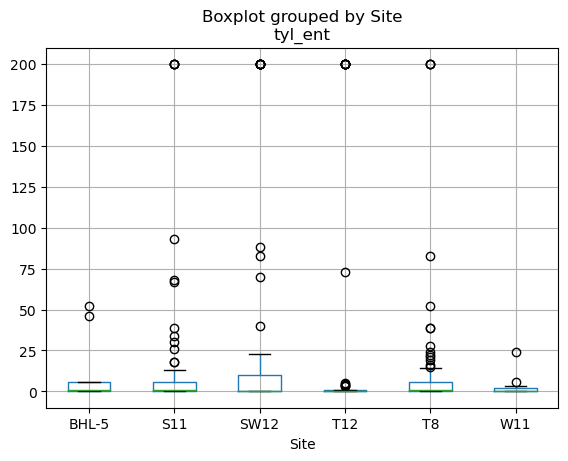

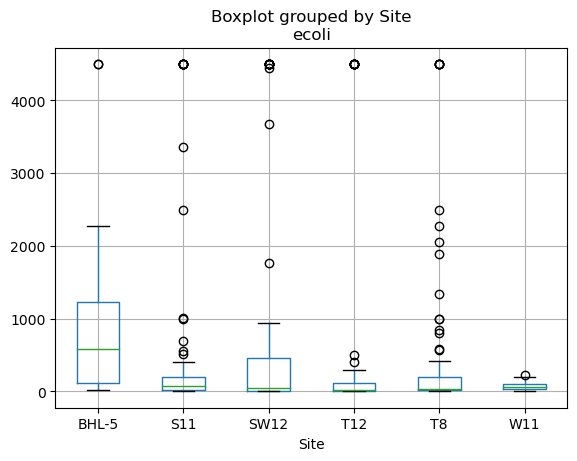

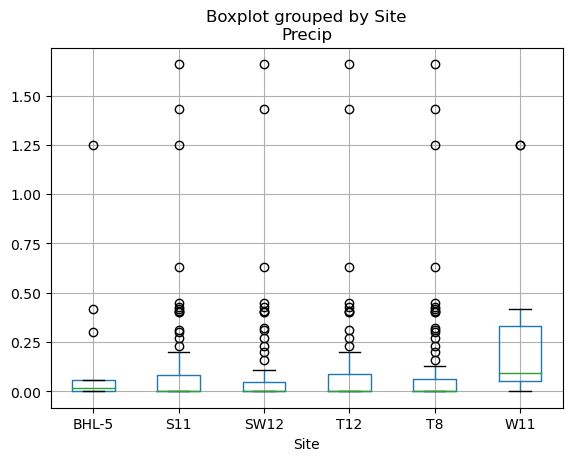

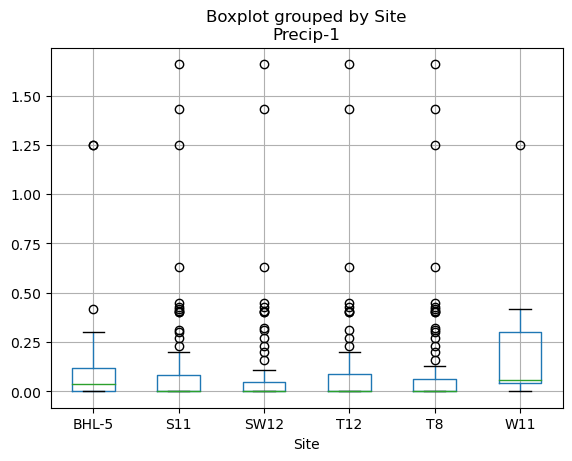

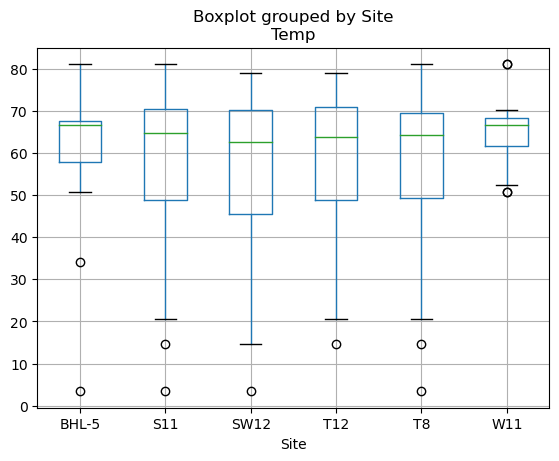

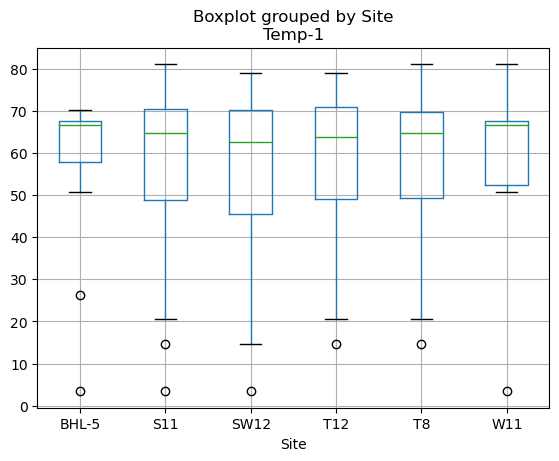

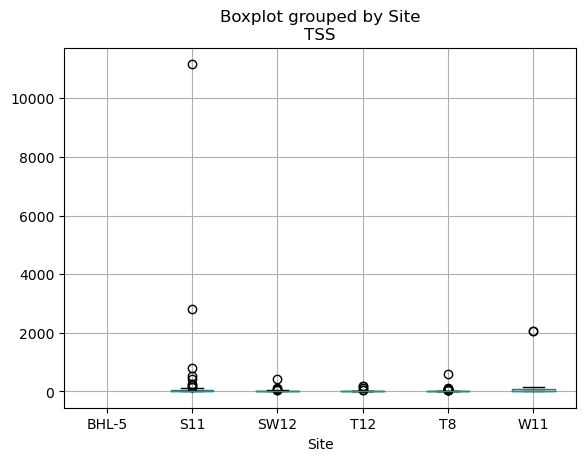

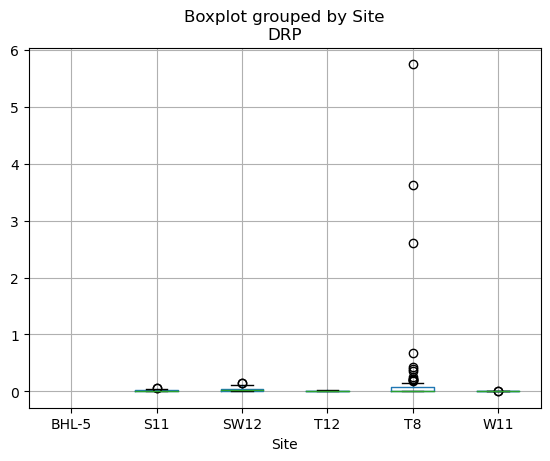

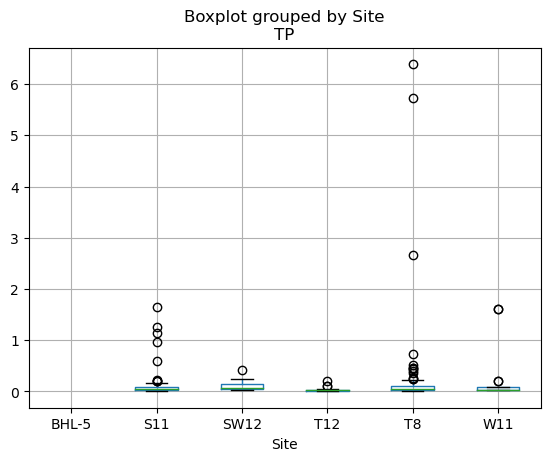

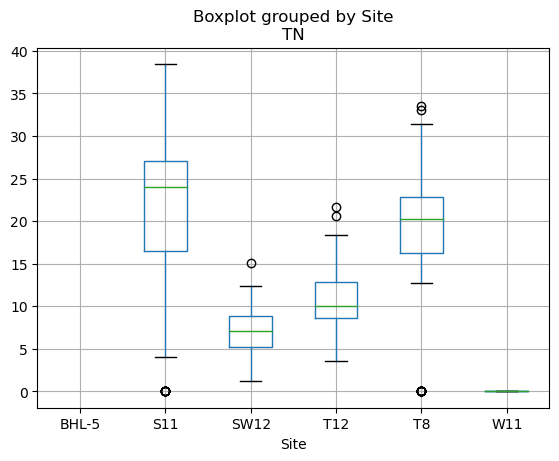

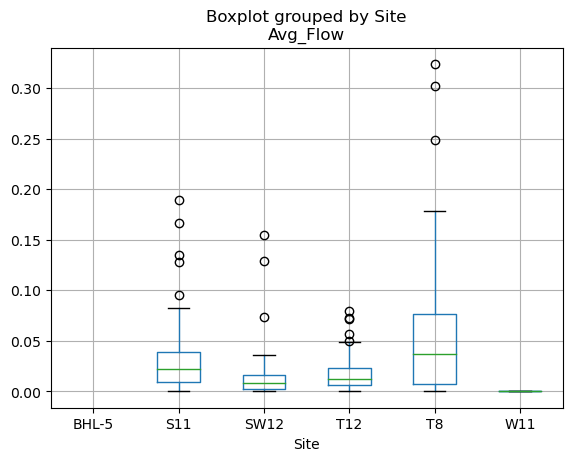

In [293]:
# Viewing the box plot again to see how the data looks now
list = ['ent', 'tet_ent', 'tyl_ent', 'ecoli', 'Precip', 'Precip-1','Temp', 'Temp-1', 'TSS', 'DRP', 'TP', 'TN', 'Avg_Flow']

for col in list:
    fib_sel_var.boxplot(column=col, by='Site');
plt.show()

In [304]:
#Importing ML libraries

import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
import matplotlib.colors as mcolors


%matplotlib inline

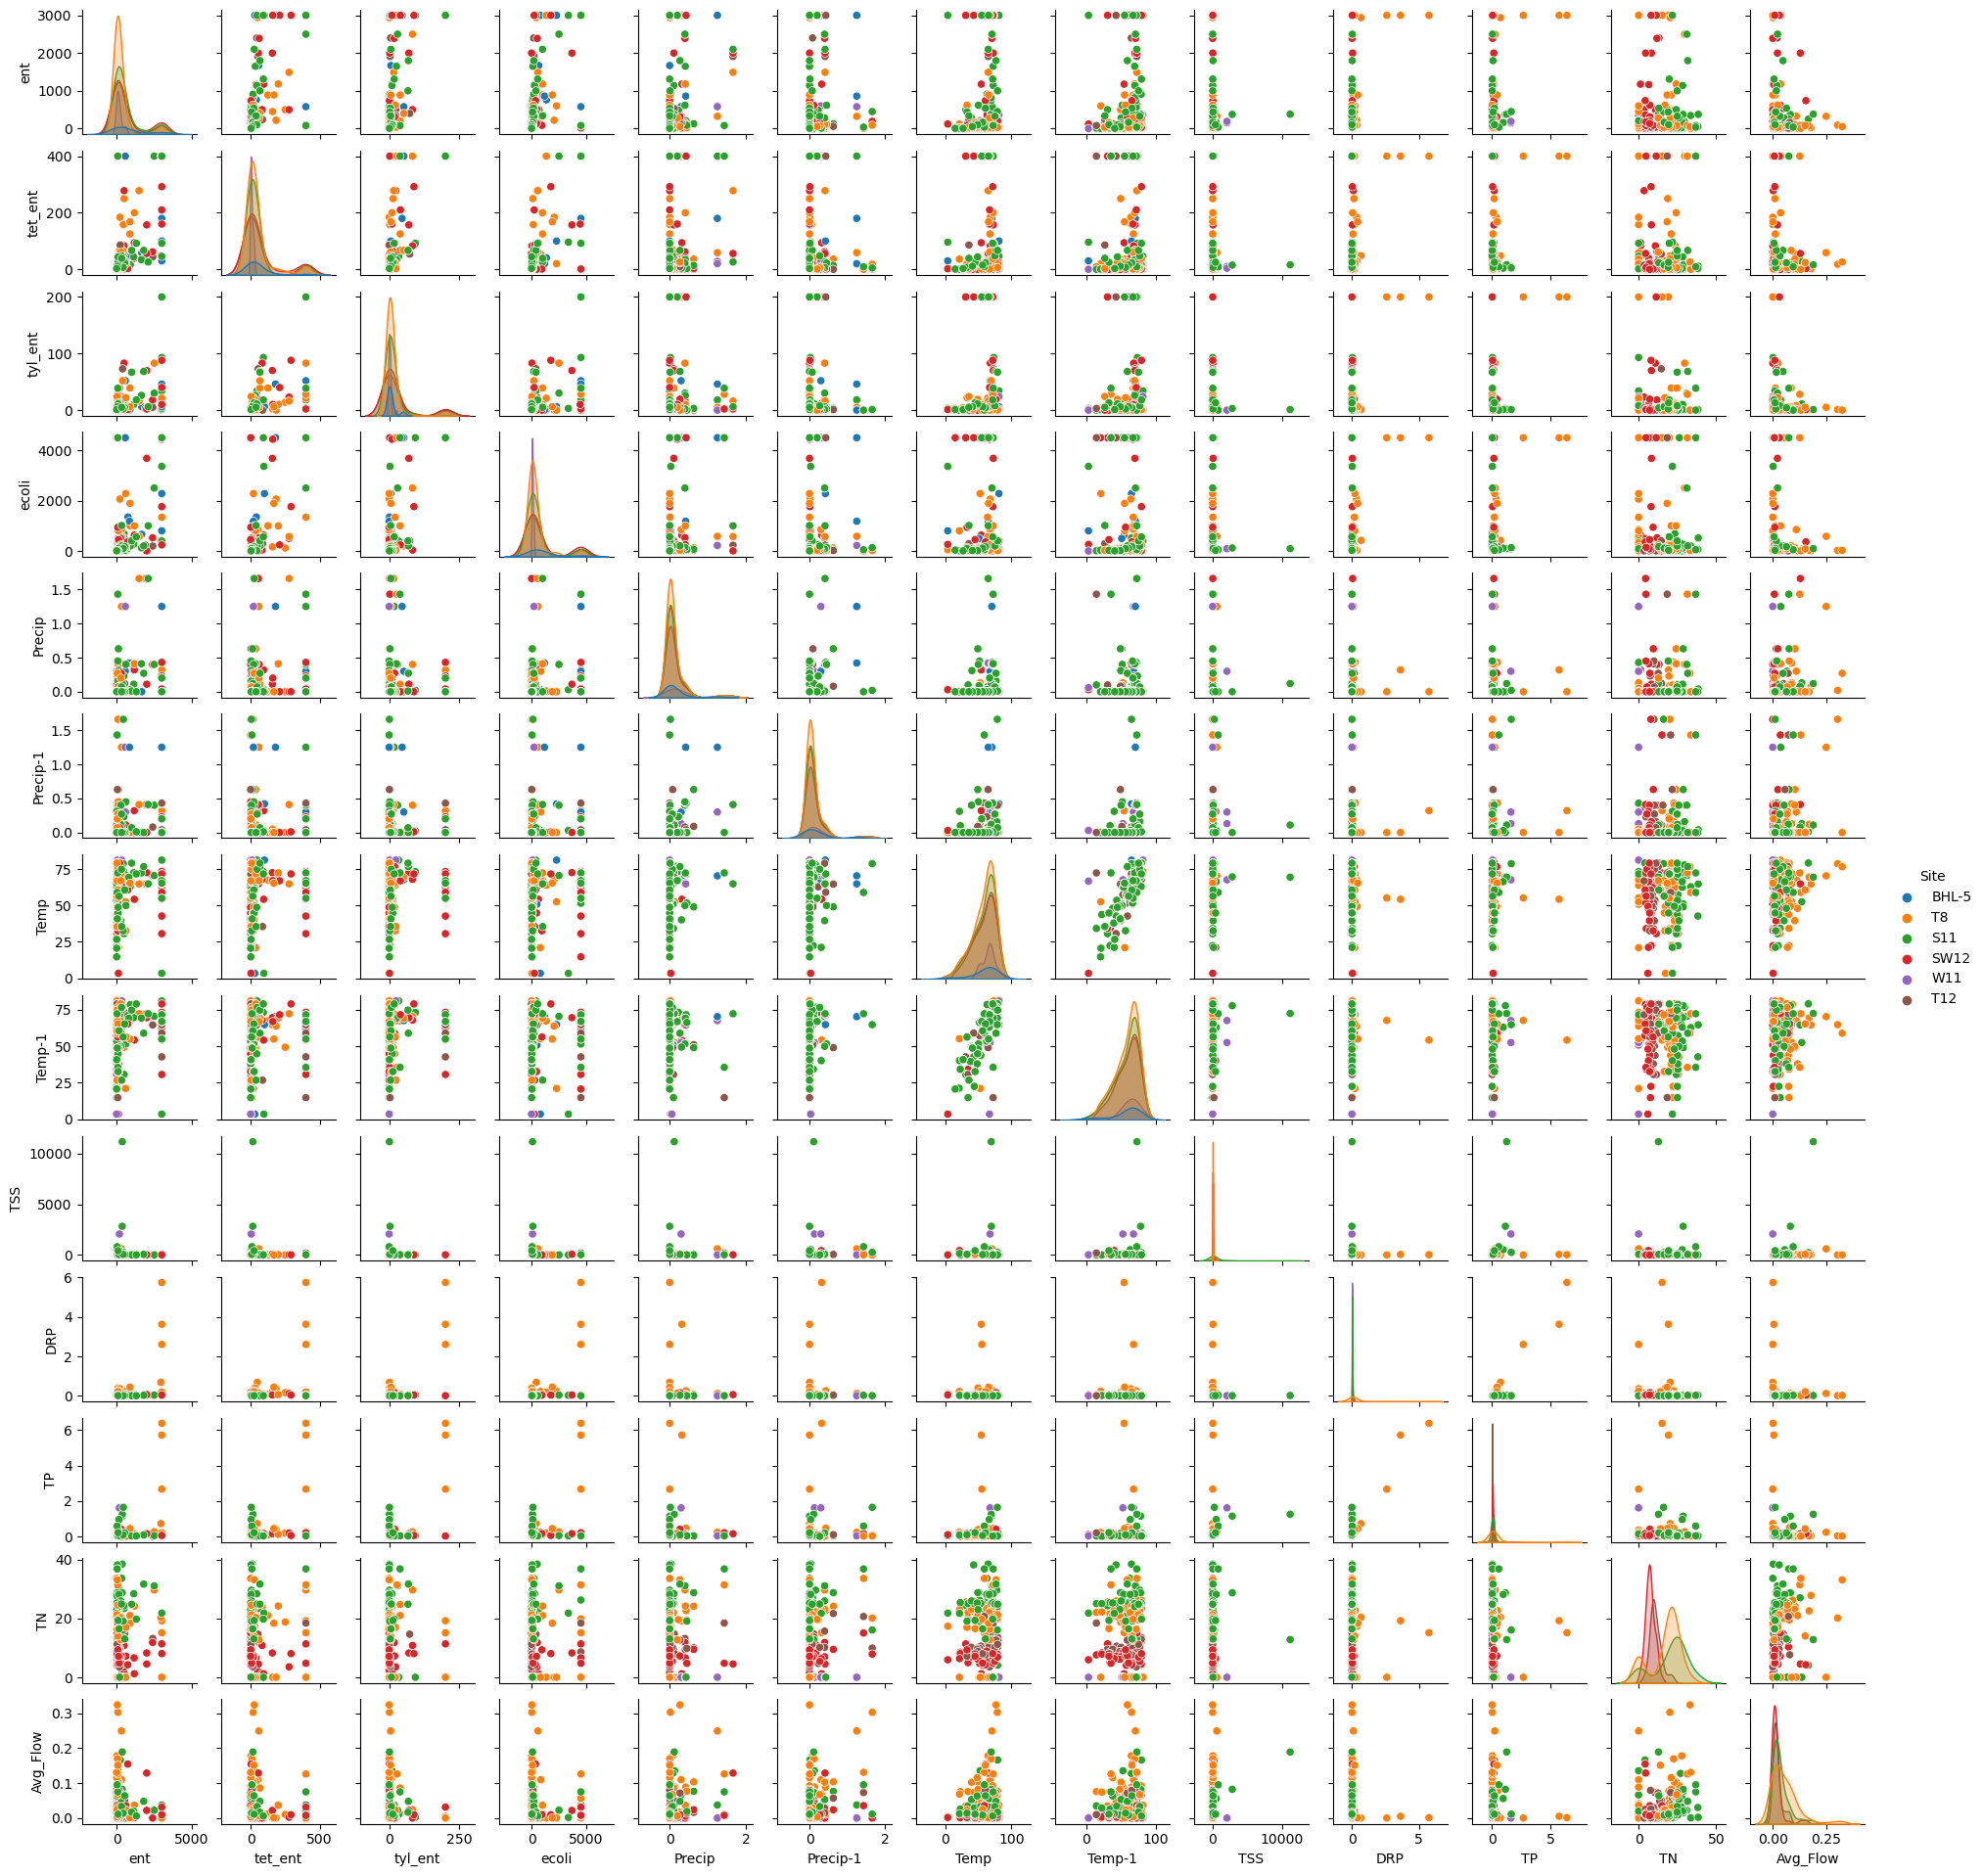

In [305]:
# Creating a pairplot of all the variables
sns.pairplot(fib_sel_var, hue ='Site', height=1.5)

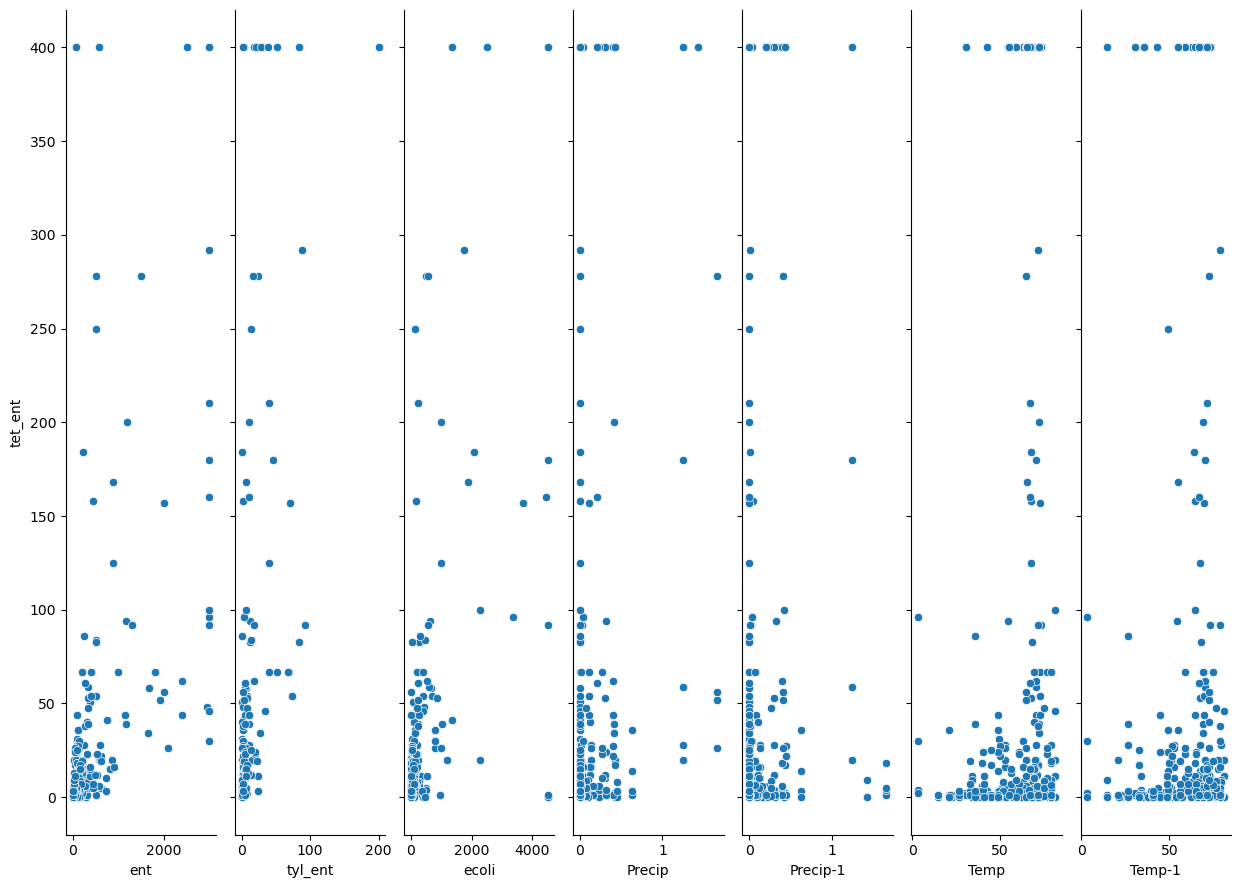

In [314]:
# Since we intend to develop a regression model to predict "tet_ent", we plot all variables against the variable "tet_ent"
sns.pairplot(fib_sel_var, x_vars=['ent', 'tyl_ent', 'ecoli', 'Precip', 'Precip-1','Temp', 'Temp-1'], y_vars='tet_ent', height=9, aspect=0.2)

In [331]:
#Fitting the regression model from scikitlearn on our dataset
mod = smf.ols(formula='tet_ent ~ ent + ecoli + tyl_ent + Precip + Temp', data=fib_sel_var)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                tet_ent   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     393.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          2.51e-135
Time:                        23:53:01   Log-Likelihood:                -1723.5
No. Observations:                 330   AIC:                             3459.
Df Residuals:                     324   BIC:                             3482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.9269      8.953     -1.891      0.0

In [312]:
# Extracting the paramertes of regression equation, i.e., the regression coefficient of each variable
res.params

Intercept   -16.926911
ent           0.016997
ecoli         0.030671
tyl_ent       1.060407
Precip       65.020699
Temp          0.242464
dtype: float64

In [313]:
# Checking model performance
res.rsquared

0.8587408165733541